In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from pydataset import data
import numpy as  np
import scipy
from math import sqrt

/usr/local/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Wine Classification

In [2]:
data = pd.read_fwf("wine.data")
data

,"1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065"
0,"1,13.2,1.78,2.14,11.2,100,2.65,2.76,.26,1.28,4.38,1.05,3.4,1050"
1,"1,13.16,2.36,2.67,18.6,101,2.8,3.24,.3,2.81,5.68,1.03,3.17,1185"
2,"1,14.37,1.95,2.5,16.8,113,3.85,3.49,.24,2.18,7.8,.86,3.45,1480"
3,"1,13.24,2.59,2.87,21,118,2.8,2.69,.39,1.82,4.32,1.04,2.93,735"
4,"1,14.2,1.76,2.45,15.2,112,3.27,3.39,.34,1.97,6.75,1.05,2.85,1450"
...,...
172,"3,13.71,5.65,2.45,20.5,95,1.68,.61,.52,1.06,7.7,.64,1.74,740"
173,"3,13.4,3.91,2.48,23,102,1.8,.75,.43,1.41,7.3,.7,1.56,750"
174,"3,13.27,4.28,2.26,20,120,1.59,.69,.43,1.35,10.2,.59,1.56,835"
175,"3,13.17,2.59,2.37,20,120,1.65,.68,.53,1.46,9.3,.6,1.62,840"


Alright so clearly this database does no have anything to do with what I want. What I have in mind instead is to make a classification project. I can recreate the last one and then be able to make something of note from there.

In [3]:
df = pd.read_csv("winemag_data.csv")
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overl...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth while still structured. Firm tannins ar...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and rind dominate. Some green pineapple pok...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom start off the aromas. The palate is a bi...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling (Lake Michigan Shore),Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this comes across as rather rough and tannic...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child Block Pinot Noir (Willamette Valley),Pinot Noir,Sweet Cheeks


In [4]:
df.shape

(129971, 14)

In [5]:
df.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


In [7]:
df.dtypes

Unnamed: 0                 int64
country                   object
description               object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
region_2                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
dtype: object

Price and point distribution (put a graph here tomorrow)

In [8]:
sumstats = df.describe().T
sumstats['range'] = sumstats['max'] - sumstats['min']
sumstats

,count,mean,std,min,25%,50%,75%,max,range
Unnamed: 0,129971.0,64985.000000,37519.540256,0.0,32492.5,64985.0,97477.5,129970.0,129970.0
points,129971.0,88.447138,3.039730,80.0,86.0,88.0,91.0,100.0,20.0
price,120975.0,35.363389,41.022218,4.0,17.0,25.0,42.0,3300.0,3296.0


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,129971.0,64985.000000,37519.540256,0.0,32492.5,64985.0,97477.5,129970.0
points,129971.0,88.447138,3.039730,80.0,86.0,88.0,91.0,100.0
price,120975.0,35.363389,41.022218,4.0,17.0,25.0,42.0,3300.0


UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U9'), dtype('float64')) -> None

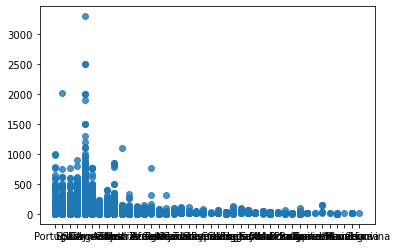

In [18]:
sns.regplot(data = df, x = "country", y='price')
#bin these into 20

<AxesSubplot:xlabel='price', ylabel='Count'>

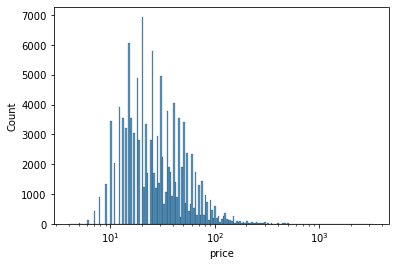

In [19]:
sns.histplot(data = df, x='price', log_scale=True)

In [ ]:
df.price

0          NaN
1         15.0
2         14.0
3         13.0
4         65.0
          ... 
129966    28.0
129967    75.0
129968    30.0
129969    32.0
129970    21.0
Name: price, Length: 129971, dtype: float64

In [ ]:
df.isna().sum()

Unnamed: 0                   0
country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

In [ ]:
df.isna().mean()

Unnamed: 0               0.000000
country                  0.000485
description              0.000000
designation              0.288257
points                   0.000000
price                    0.069215
province                 0.000485
region_1                 0.163475
region_2                 0.611367
taster_name              0.201922
taster_twitter_handle    0.240154
title                    0.000000
variety                  0.000008
winery                   0.000000
dtype: float64

In [ ]:
df.dtypes

Unnamed: 0                 int64
country                   object
description               object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
region_2                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
dtype: object

In [ ]:
df.country.value_counts()

US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14
Serbia  

In [ ]:
df.designation.value_counts().head(20)

Reserve            2009
Estate             1322
Reserva            1259
Riserva             698
Estate Grown        621
Brut                513
Dry                 413
Barrel sample       375
Crianza             343
Estate Bottled      342
Vieilles Vignes     308
Brut Rosé           276
Gran Reserva        261
Barrel Sample       252
Tradition           238
Old Vine            221
Extra Dry           204
Rosé of             172
Rosé                166
Réserve             153
Name: designation, dtype: int64

In [ ]:
df.province.value_counts().head(20)

California            36247
Washington             8639
Bordeaux               5941
Tuscany                5897
Oregon                 5373
Burgundy               3980
Northern Spain         3851
Piedmont               3729
Mendoza Province       3264
Veneto                 2716
New York               2688
Alsace                 2440
Northeastern Italy     2138
Loire Valley           1856
Sicily & Sardinia      1797
Champagne              1613
Southwest France       1503
South Australia        1349
Southern Italy         1349
Provence               1346
Name: province, dtype: int64